Nama : Irgiyansyah <br>
NIM : 211351068 <br>
Kelas : Malam B

# Import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irgiys","key":"8e9e867d3f54018acd12e3e707b02820"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d whenamancodes/predict-diabities

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 9.63MB/s]


In [ ]:
!mkdir predict-diabities
!unzip predict-diabities.zip -d predict-diabities
!ls predict-diabities

Archive:  predict-diabities.zip
  inflating: predict-diabities/diabetes.csv  
diabetes.csv


# Import library yang digunakan

In [ ]:
# library yang umum digunakan untuk manipulasi dan analisis data.
import pandas as pd
import numpy as np

# library untuk visualisasi data dan pemetaan.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from mlxtend.plotting import plot_decision_regions

# library yang digunakan untuk pembelajaran mesin, termasuk model, pemrosesan data, dan pengukuran kinerja model.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import metrics

# libary untuk save model
import pickle

# untuk menonaktifkan warning abaikan (ignore)
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

# Data Discovery

In [ ]:
# Inisialisasi DataFrame
df = pd.read_csv('/content/predict-diabities/diabetes.csv')

In [ ]:
# Menampilkan 5 sampel data teratas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Informasi tiap kolom, seperti tipe data, disini kita memiliki yang sudah numerik semua
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Gambaran singkat tentang distribusi nilai-nilai dalam setiap kolom numerik
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom, dapat kita lihat bahwa tidak ada null pada tiap kolom
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Menghitung data duplikat dan kita dapati 0 yang dimana itu sangat bagus
df.duplicated().sum()

0

In [ ]:
# Ada dua kondisi label 1: diabetes 0: tidak
df["Outcome"].unique()

array([1, 0])

In [ ]:
print(f'DataSet ini memiliki {df.shape[0]} baris & {df.shape[1]} kolom.')

DataSet ini memiliki 768 baris & 9 kolom.


# EDA (minimal 5)

<Axes: >

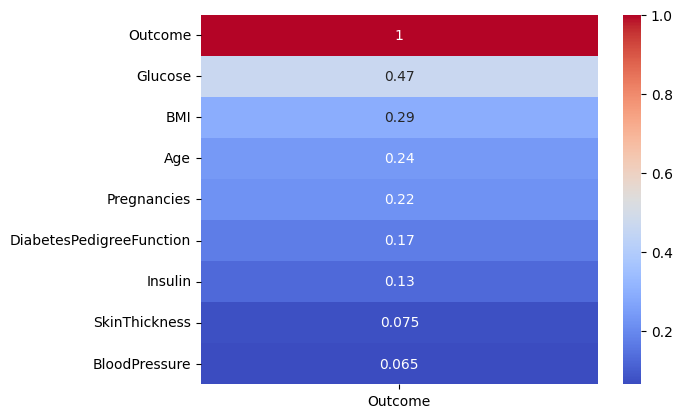

In [ ]:
# Kita lihat korelasi tertinggi diantara feature dengan label dann Glucose memiliki korelasi paling tinggi yaitu 0.47
corr_matrix = df.corr()["Outcome"].sort_values(ascending=False)
sns.heatmap(corr_matrix.to_frame(),cmap="coolwarm", annot=True)

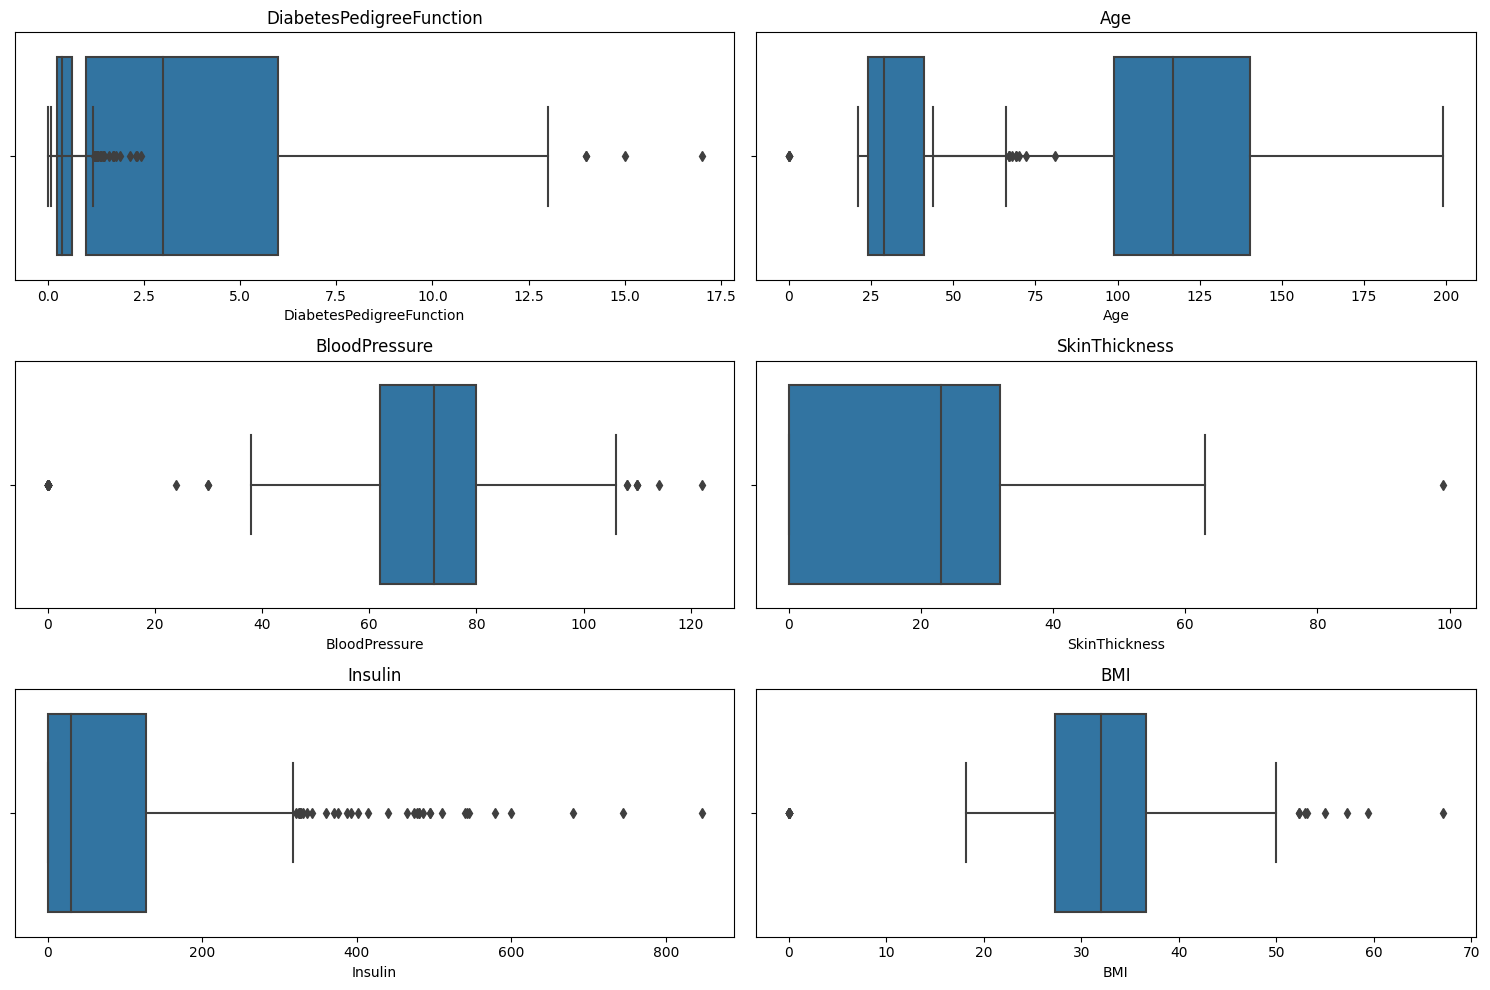

In [ ]:
# Menampilakan box plot dari masing-masing feature
parameters = list(df.columns.drop(["Outcome"])) # Hapus label

plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 2, i % 6 + 1)
    sns.boxplot(x=df[parameter])
    plt.title(parameter)

    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()

In [ ]:
# Fungsi untuk membuat histogram feature dengan label
def create_hist(outcome_label_1, outcome_label2, title):
    trace2 = go.Histogram(
        x=outcome_label_1,
        opacity=0.75,
        name='Diabetes',
        marker=dict(color='navy')
    )

    trace1 = go.Histogram(
        x=outcome_label2,
        opacity=0.75,
        name='Non-diabetes',
        marker=dict(color='salmon')
    )

    layout = go.Layout(
        barmode='overlay',
        title_text=f'{title} Histogram by Outcome',
        xaxis=dict(title=f'{title}'),
        yaxis=dict(title='Frequency')
    )

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    return fig

In [ ]:
# Dari histogram yang ditampilkan dapat kita artikan semakin tinggi glucose semakin besar kemungkinan diabetes
Glucose_outcome_1 = df[df['Outcome'] == 1]['Glucose']
Glucose_outcome_0 = df[df['Outcome'] == 0]['Glucose']

create_hist(Glucose_outcome_1, Glucose_outcome_0, "Glucose")

In [ ]:
# Dari histogram dibawah dapat kita artikan bahwa sebagian besar orang yang memiliki BMI kurang dari 25 tidak mengalami diabetes. Hanya sedikit yang mengalami diabetes.
BMI_outcome_1 = df[df['Outcome'] == 1]['BMI']
BMI_outcome_0 = df[df['Outcome'] == 0]['BMI']

create_hist(BMI_outcome_1, BMI_outcome_0, "BMI")

In [ ]:
# Berdasarkan histogram tersebut, dapat kita simpulkan bahwa risiko menderita diabetes meningkat seiring dengan bertambahnya usia.
Age_outcome_1 = df[df['Outcome'] == 1]['Age']
Age_outcome_0 = df[df['Outcome'] == 0]['Age']

create_hist(Age_outcome_1, Age_outcome_0, "Age")

In [ ]:
# Histogram ini menunjukkan bahwa sebagian besar Pregnancies tidak mengalami diabetes. Hanya sekitar 12% Pregnancies yang mengalami diabetes.
Pregnancies_outcome_1 = df[df['Outcome'] == 1]['Pregnancies']
Pregnancies_outcome_0 = df[df['Outcome'] == 0]['Pregnancies']

create_hist(Pregnancies_outcome_1, Pregnancies_outcome_0, "Pregnancies")

In [ ]:
# Histogram ini menunjukkan bahwa sebagian besar Pregnancies tidak mengalami diabetes. Hanya sekitar 12% Pregnancies yang mengalami diabetes.
DiabetesPedigreeFunction_outcome_1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
DiabetesPedigreeFunction_outcome_0 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']

create_hist(DiabetesPedigreeFunction_outcome_1, DiabetesPedigreeFunction_outcome_0, "DiabetesPedigreeFunction")

# Preprocessing

In [ ]:
# Hapus ada baris data null
df.dropna(inplace=True)

In [ ]:
# Menghapus baris data yang duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Inisialisasi feature dan label
X = df.drop('Outcome',axis=1).values
Y = df[["Outcome"]]

In [ ]:
# Membagi dataset menjadi dua subset, subset untuk training (training set) dan subset untuk testing (test set).
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=20)

In [ ]:
# Sebelum membuat model, kita scaling data training dan testing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

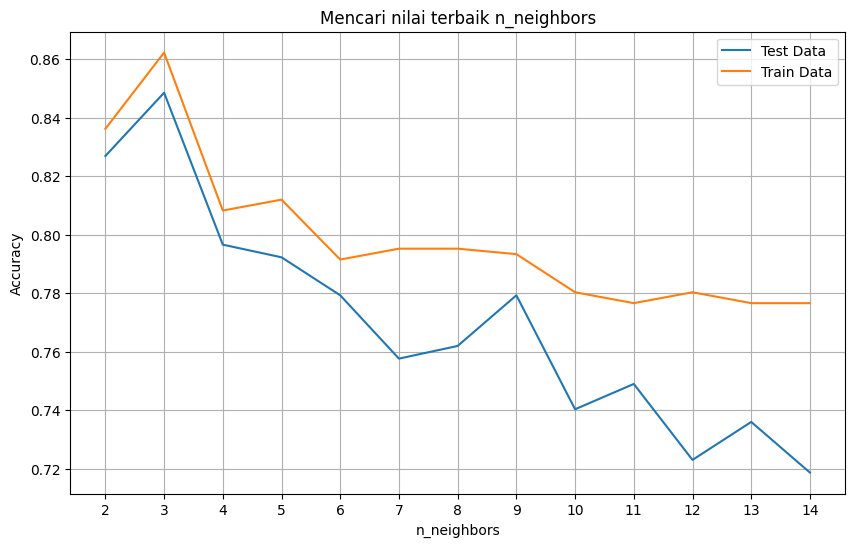

In [ ]:
# Evaluasi performa dari model dan mencari nilai n terbaik pada model kita
X_axis = list(range(2, 15))
acc_test = pd.Series()
acc_train = pd.Series()

for i in range(2, 15):
    knn_model_test = KNeighborsClassifier(n_neighbors=i)
    knn_model_test.fit(X_test, y_test)
    acc_test = acc_test.append(pd.Series(knn_model_test.score(X_test, y_test)))

    knn_model_train = KNeighborsClassifier(n_neighbors=i)
    knn_model_train.fit(X_train, y_train)
    acc_train = acc_train.append(pd.Series(knn_model_train.score(X_train, y_train)))

x = range(2, 15)

plt.figure(figsize=(10, 6))

plt.plot(X_axis, acc_test, label='Test Data')
plt.plot(X_axis, acc_train, label='Train Data')

plt.xticks(x)
plt.title("Mencari nilai terbaik n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

print('Highest test value: ', acc_test.max())
print('Highest train value: ', acc_train.max())

In [ ]:
# Dapat kita lihat score tertinggi berada pada n3 dan kita akan menggunakan 3 untuk akurasi yang lebih baik
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

print("Akurasi model KNN =", knn_model.score(X_test,y_test))

Highest test value:  0.8484848484848485
Highest train value:  0.8621973929236499
Akurasi model KNN = 0.7489177489177489


In [ ]:
# Inisialisasi variabel untuk prediksi
prediction = knn_model.predict(X_test)

# Kita uji prediksi dengan sampel data dari dataset
# input_data = np.array([[1,89,66,23,94,28.1,0.167,21]]) # 0
input_data = np.array([[6,148,72,35,0,33.6,0.627,50]]) # 1

prediction = knn_model.predict(input_data)
if(prediction[0] == 1) :
  print("Diabetes")
else:
  print("Tidak diabetes")

Diabetes


# Visualisasi hasil algoritma

In [ ]:
# Fungsi untuk menampilkan plot decision boundary
# Disini kita menggunakan Glucose dikarenakan memiliki korelasi tertinggi sedangkan BloodPressure terendah
def knn_comparison(data, k, ax):
    x = data[['Glucose','BloodPressure']].values
    y = data['Outcome'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    plot_decision_regions(x, y, clf=clf, legend=2, ax=ax)
    ax.set_xlabel('Glucose')
    ax.set_ylabel('Blood Pressure')
    ax.set_title('Knn with K=' + str(k))

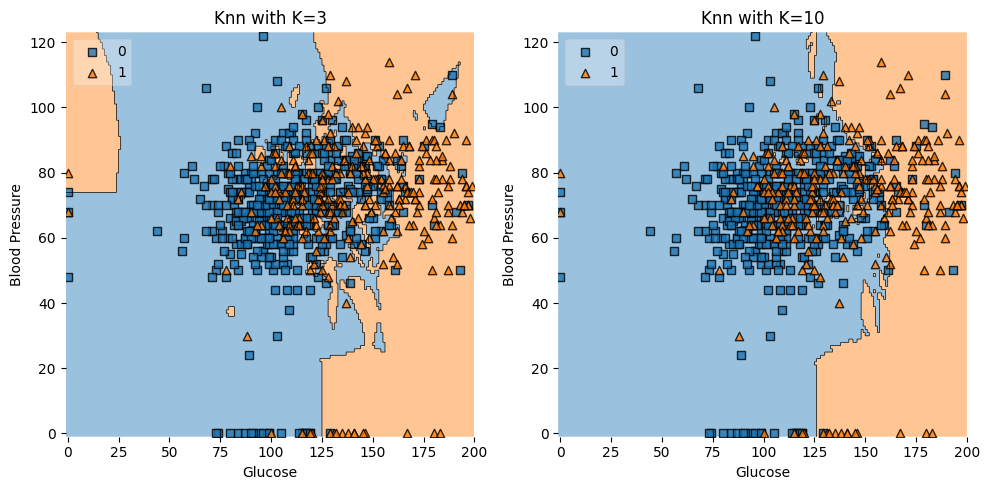

In [ ]:
# Dapat kita lihat semakin tinggi Glocose semakin besar kemungkinan terkena diabetes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ks = [3, 10]

for i, ax in enumerate(axs.flatten()):
    knn_comparison(df, ks[i], ax)

plt.tight_layout()
plt.show()

# Import Model

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))

# Matrix evaluasi

Text(0.5, 23.52222222222222, 'Predicted label')

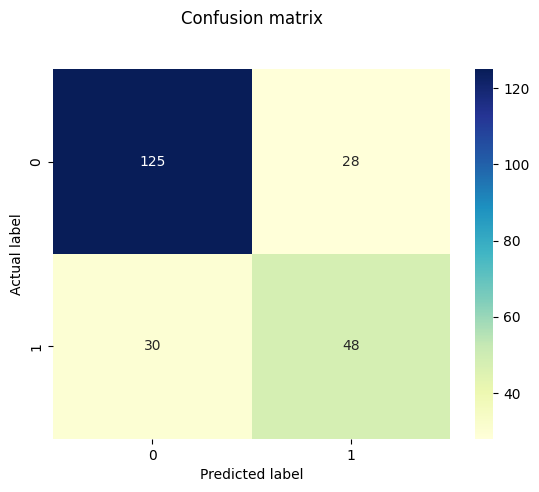

In [ ]:
# Disini saya menggunakan confusion matrix untuk matrix evaluasinya
y_pred = knn_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Berdasarkan confusion matrix diatas, dapat disimpulkan bahwa model tersebut memprediksi label dengan benar untuk 120 data positif dan 60 data negatif. Namun, model tersebut juga membuat kesalahan dalam memprediksi label untuk 28 data positif (FP) dan 30 data negatif (FN).
